In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [4]:
bathym = dv.mbathy

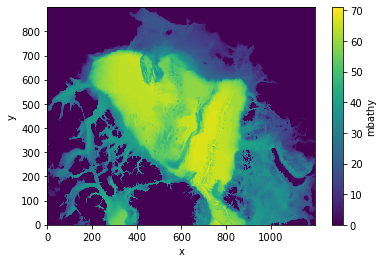

In [5]:
bathym.plot()

In [6]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [7]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [37]:
p = p_list[1]
x,y,z = latlon_to_xyz(p[1],p[0])
print(x,y,z)

830.2672625246594 501.54775861623307 6296.725110611615


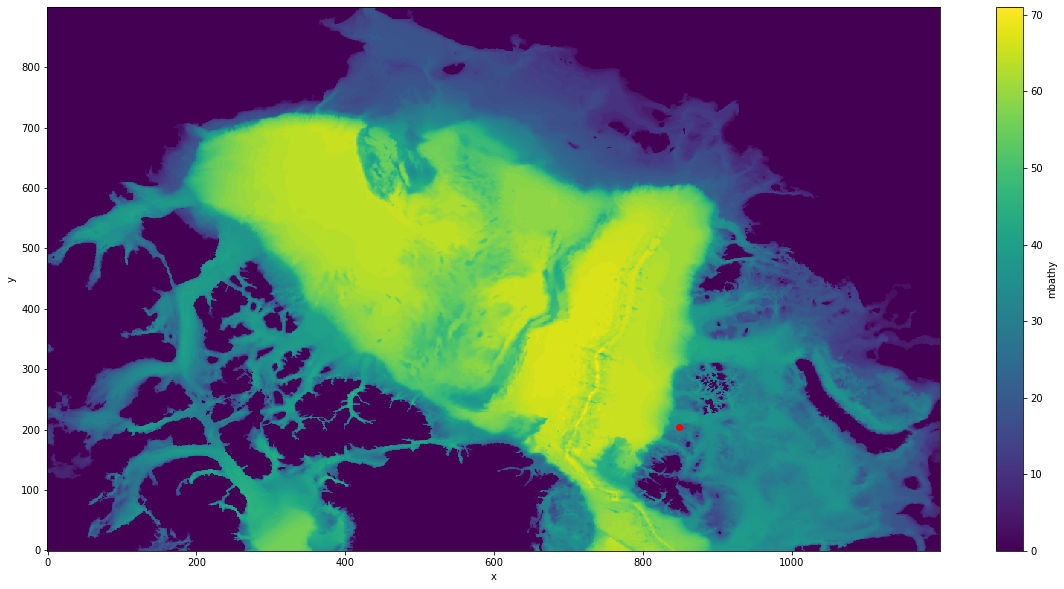

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.plot()
ax.plot(848, 204, marker='o', color='r')

Deler inn i tre kart for hvert sted

In [88]:
# Barents sea

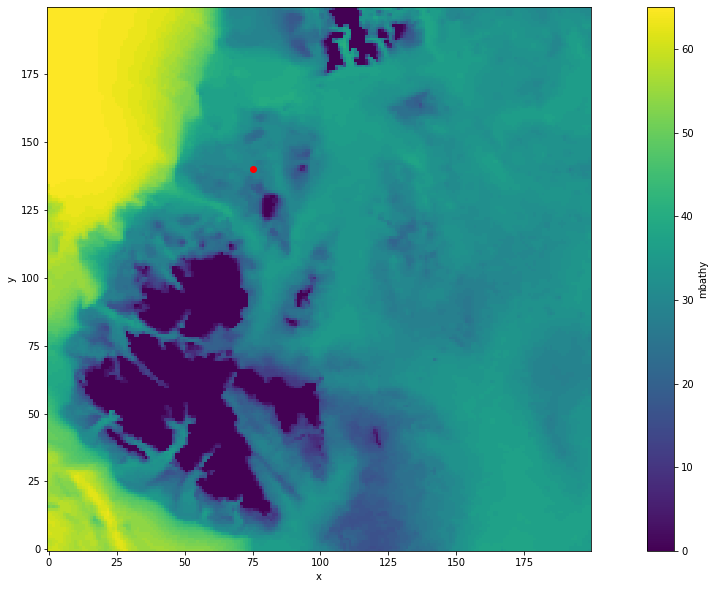

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.isel(x=slice(780,980), y=slice(50,250)).plot()
ax.plot(75,140,marker='o', color='r')
ax.set_aspect('equal')

# Location for each mooring: 

- d13: latitude: 81◦24.202’N
       longitude: 31◦13.247’E
- d15: latitude: 81◦24.255’N
       longitude: 31◦13.533’E
- d17: latitude: 81◦24.587’N
       lonitude: 31◦14.506’E
- MB: latitude: 69 N 52.89
      longitude: 011E 11.89
- MW: latitude: 68 N 58.759
      longitude: 013E 16.845 
- MN: latitude: 68 N 56.109
      lonitude: 013E 19.866
- MS: latitude: 68 N 50.128
      longitude: 012E 45.082   
- y1: longitude: 79.37209
      lontitude: 5.57541
- y2: latitude: 80.03876
      longitude: 5.48733
- y3: latitude: 79.44093
      longitude: 5.56333


In [ ]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [147]:
p = p_list[0]
p_lat = p[1]
p_lon = p[0]
p_lat

81.24202

In [129]:
lat = bathym.nav_lat
lon = bathym.nav_lon

In [133]:
b = lon.isel(x=slice(840,850), y=slice(180,190)).values
b

array([[29.943398, 30.104471, 30.26462 , 30.42385 , 30.582165, 30.739574,
        30.89608 , 31.051691, 31.206413, 31.360252],
       [30.132492, 30.293442, 30.45346 , 30.612553, 30.77073 , 30.927994,
        31.08435 , 31.239807, 31.394373, 31.548048],
       [30.322594, 30.48341 , 30.643291, 30.802242, 30.96027 , 31.117382,
        31.273584, 31.42888 , 31.58328 , 31.736786],
       [30.513704, 30.67438 , 30.834116, 30.992918, 31.150791, 31.307745,
        31.463783, 31.618912, 31.773138, 31.926468],
       [30.705824, 30.866352, 31.025936, 31.184582, 31.342293, 31.49908 ,
        31.65495 , 31.809902, 31.963947, 32.117092],
       [30.898958, 31.059332, 31.218756, 31.377237, 31.53478 , 31.691395,
        31.847084, 32.001854, 32.155712, 32.308666],
       [31.09311 , 31.25332 , 31.412577, 31.570887, 31.728254, 31.884686,
        32.040188, 32.19477 , 32.348434, 32.50119 ],
       [31.28828 , 31.448322, 31.607405, 31.765533, 31.922714, 32.07896 ,
        32.234272, 32.388653, 32.5421

In [136]:
a = lat.isel(x=slice(840,850), y=slice(180,190)).values
a

array([[80.85306 , 80.825195, 80.79727 , 80.76927 , 80.74121 , 80.71308 ,
        80.68488 , 80.656624, 80.628296, 80.5999  ],
       [80.88066 , 80.85273 , 80.82472 , 80.796646, 80.76851 , 80.7403  ,
        80.71202 , 80.683685, 80.65528 , 80.62681 ],
       [80.90816 , 80.88014 , 80.85205 , 80.823906, 80.795685, 80.767395,
        80.739044, 80.710625, 80.682144, 80.653595],
       [80.935524, 80.90743 , 80.879265, 80.851036, 80.82274 , 80.79437 ,
        80.765945, 80.73745 , 80.708885, 80.68026 ],
       [80.962776, 80.9346  , 80.90636 , 80.878044, 80.84967 , 80.82123 ,
        80.79272 , 80.764145, 80.73551 , 80.70681 ],
       [80.98991 , 80.961655, 80.93333 , 80.90494 , 80.87648 , 80.84796 ,
        80.819374, 80.790726, 80.76201 , 80.73323 ],
       [81.016914, 80.98858 , 80.96018 , 80.93171 , 80.903175, 80.87458 ,
        80.84591 , 80.81718 , 80.78838 , 80.75953 ],
       [81.0438  , 81.01538 , 80.9869  , 80.95835 , 80.92974 , 80.90106 ,
        80.87232 , 80.843506, 80.8146

In [130]:
a[4][8]

81.24131

In [123]:
lat.isel(x=slice(840,850), y=slice(204,205)).values

array([[81.481285, 81.4515  , 81.421646, 81.39174 , 81.36177 , 81.33175 ,
        81.30166 , 81.271515, 81.24131 , 81.21105 ]], dtype=float32)

<xarray.DataArray 'mbathy' (t: 1, y: 900, x: 1200)>
dask.array<xarray-mbathy, shape=(1, 900, 1200), dtype=int16, chunksize=(1, 900, 1200), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
Dimensions without coordinates: t, y, x

In [155]:
dzz

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables: (12/19)
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>
    ...            ...
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    TimeStamp:  06/06/2019 11:16:36 +0200
    file_name:  mesh_zgr.nc

In [156]:
lat.values

array([[65.65805 , 65.67766 , 65.69729 , ..., 65.47358 , 65.44332 ,
        65.413055],
       [65.679245, 65.698875, 65.71853 , ..., 65.49864 , 65.468346,
        65.43805 ],
       [65.70039 , 65.72004 , 65.73972 , ..., 65.52364 , 65.493324,
        65.46298 ],
       ...,
       [60.260918, 60.274937, 60.288967, ..., 59.362286, 59.339825,
        59.31735 ],
       [60.230377, 60.244366, 60.258366, ..., 59.32921 , 59.30679 ,
        59.28435 ],
       [60.19979 , 60.213753, 60.227726, ..., 59.296104, 59.273724,
        59.251328]], dtype=float32)

In [145]:
lat.nav_lat.values.shape

(900, 1200)

In [148]:
lat.sel(nav_lat=p_lat, nav_lon=p_lon, method='nearest')

ValueError: dimensions or multi-index levels ['nav_lat', 'nav_lon'] do not exist

In [134]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [135]:
ds = open_s3fs('PC-data')

In [137]:
u = du.vozocrtx.isel(y=slice(900,1800), x=slice(200,1400))
#v = dv.vomecrty.isel(y=slice(900,1800), x=slice(200,1400))
mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))

In [126]:
def dyp(depth): 
    depth = int(depth)
    dyp = np.zeros(depth, dtype=int)
    #d = du.depth.isel(depth=depth).values
    for i in range(len(dyp)):
        d = du.depth[i].values #gdepth_1d
        dyp[i] = d
    return dyp  

In [32]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://data/PCz.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
pc = xr.open_zarr(store=store, consolidated=True)
pc = pc.rename_dims({'dim_0': 'x_', 'dim_1': 'y_'})
pc 

<xarray.Dataset>
Dimensions:  (x_: 1200, y_: 900)
Dimensions without coordinates: x_, y_
Data variables:
    PC11     (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    PC12     (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    depth    (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    x        int64 ...
    y        int64 ...

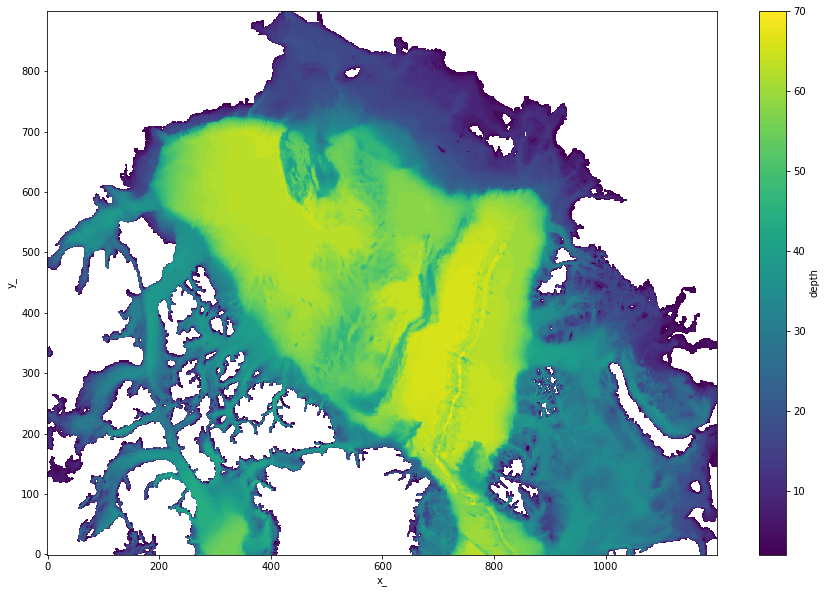

In [39]:
pc.depth.T.plot(figsize = (15,10))

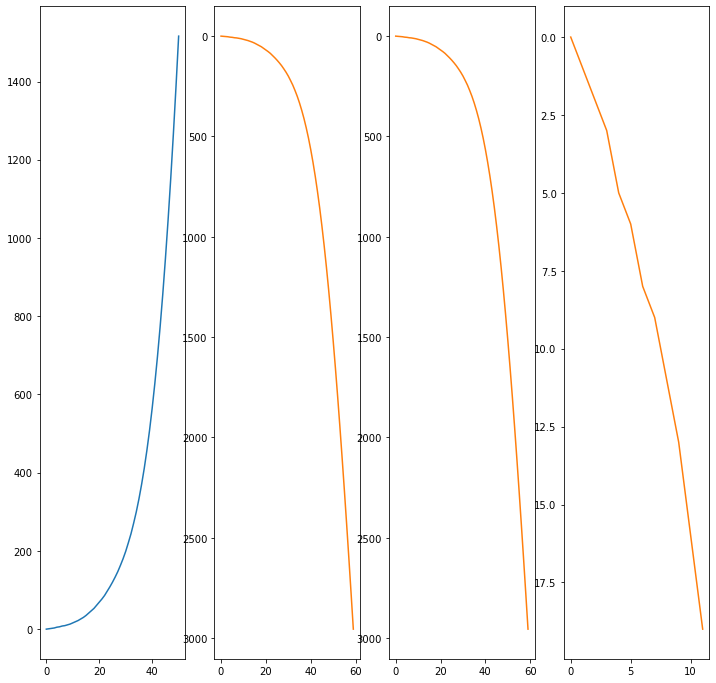

In [133]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,12))

#ax1.plot(pc.PC11.isel(x_=380,y_=400),pc.PC12.isel(x_=380,y_=400), dyp(pc.depth.isel(x_=380,y_=400).values))
ax1.plot(dyp(pc.depth.isel(x_=380,y_=400).values))
#ax1.invert_yaxis()
ax4.plot(pc.PC11.isel(x_=660,y_=790),pc.PC12.isel(x_=660,y_=790), dyp(pc.depth.isel(x_=660,y_=790).values) )
ax4.invert_yaxis()
ax3.plot(pc.PC11.isel(x_=300,y_=700),pc.PC12.isel(x_=300,y_=700), dyp(pc.depth.isel(x_=300,y_=700).values) )
ax3.invert_yaxis()
ax2.plot(pc.PC11.isel(x_=500,y_=500),pc.PC12.isel(x_=500,y_=500), dyp(pc.depth.isel(x_=500,y_=500).values) )
ax2.invert_yaxis()


# tester med et punkt 

In [ ]:
x_p = 500
y_p = 500 

'Finding the level the given location dosent have values for anymore'

mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
d = mbathy.isel(x=x_p, y=y_p).values

dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
punkter = dyp.reduce(5)

cov_p = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(cov_p.shape) 
print(cov_p)
print('------------------------------------------------------')    
print(values[0]) 
print('------------------------------------------------------')    
print(values[1])
print('------------------------------------------------------')    
print(vectors[0])    